Paquetes necesarios

In [5]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [6]:
#Dimensiones de la imagen a crear
ancho = 200
alto = 300

TAREA: Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

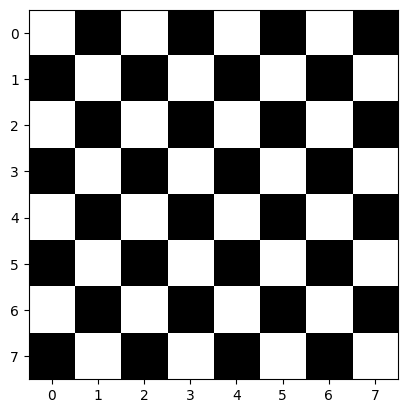

In [3]:

#Establecemos un ancho y alto concreto para este ejercicio
ancho = 8
alto = 8

gris_img = np.zeros((ancho,alto,1), dtype = np.uint8)

#Bucles para pintar cuadrados en la imagen
for i in range(0,8, 2):
    for j in range (0, 8, 2):
        gris_img[j,i,0] = 1
        gris_img[j+1,i+1,0] = 1
        
#Muestra la imagen con matplotlib
#Es necesario especificar que el mapa de color usado es de grises
plt.imshow(gris_img, cmap='gray')
plt.show()

#Reestablecemos el ancho y el alto
ancho = 200
alto = 300

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

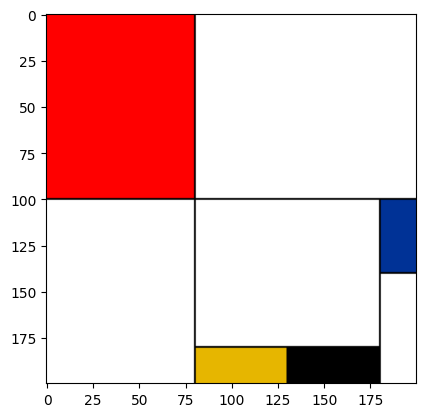

In [4]:
color_img = np.zeros((200,200,3), dtype = np.uint8)

# cambiamos el color de la imagen a blanco
for i in range(0, 3):
    color_img[:, :, i] = 255

#Bucles para pintar las líneas de la imagen
for i in range(0, 200, 1):
    for j in range(0, 200, 1):

        if i == 100:
            color_img[i, j] = 1
        if j == 80:
            color_img[i, j] = 1
            
        if i == 140 and j >= 180:
            color_img[i,j] = 1
        
        if i == 180 and j >= 80 and j < 180:
            color_img[i, j] = 1
        if i >= 180 and j == 130:
            color_img[i, j] = 1
        if i >= 100 and j == 180:
            color_img[i, j] = 1

#Bucles para rellenar los bordes creados anteriormente
for i in range(0, 200):
    for j in range(0, 200):
        if i < 100 and j < 80:
            color_img[:, :, 0][i, j] = 255
            color_img[:, :, 1][i, j] = 0
            color_img[:, :, 2][i, j] = 0
            
        if i > 180 and j > 80 and j < 130:
            color_img[:, :, 0][i, j] = 230
            color_img[:, :, 1][i, j] = 182
            color_img[:, :, 2][i, j] = 0
            
        if i > 180 and j > 130 and j < 180:
            color_img[:, :, 0][i, j] = 0
            color_img[:, :, 1][i, j] = 0
            color_img[:, :, 2][i, j] = 0
            
        if i > 100 and i < 140 and j > 180:
            color_img[:, :, 0][i, j] = 0
            color_img[:, :, 1][i, j] = 50
            color_img[:, :, 2][i, j] = 150

plt.imshow(color_img)
plt.show()

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

TAREA: Modifica de alguna forma los valores de un plano de la imagen

In [5]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones
        h, w, c = frame.shape
        
        #Modificamos el canal rojo
        modified_r = r.copy()
        modified_r[0:h,0:w] = 255 - r

        #Posibles modificaciones para el resto de planos
        # #Modificamos el canal verde
        # modified_g = g.copy()
        # modified_g[0:h,0:w] = g*g
        
        # #Modificamos el canal azul
        # modified_b = g.copy()
        # modified_b[0:h,0:w] = b*2
                
        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((modified_r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Cam3', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [8]:
vid = cv2.VideoCapture(0)

lanzado = 0
y = 0
x = 0

  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
            
    maximo = 1000
    minimo = 0
    h,w,c = frame.shape

    r = frame[:,:,0]
    g = frame[:,:,1]
    b = frame[:,:,2]
    
    #determinar zona 8x8 mas clara y mas oscura
    for i in range(0, h, 8):
        for j in range (0, w, 8):
            
            valor_rgb = r[i:i+8,j:j+8].mean() + g[i:i+8,j:j+8].mean()+ b[i:i+8,j:j+8].mean()
            
            if (valor_rgb < maximo):
                maximo = valor_rgb
                x = j
                y = i
            if (valor_rgb > minimo):
                minimo = valor_rgb
                x2 = j
                y2 = i
                
    #pintamos los circulos en las zonas indicadas
    cv2.circle(frame, (x,y), 8 ,(52, 164, 235), -1)
    cv2.circle(frame, (x2,y2), 8 ,(103, 230, 57), -1)
        
    if ret: 
        # Activa em manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
    
    # Detenemos pulsado ESC
    if cv2.waitKey(10) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Haz tu propuesta pop art

In [9]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos
        tl[:,:,0] = b
        tl[:,:,1] = g
        tl[:,:,2] = r

        tr[:,:,0] = 255 - r
        tr[:,:,1] = 255 - g
        tr[:,:,2] = b
        
        bl[:,:,0] = r
        bl[:,:,1] = 255 - b
        bl[:,:,2] = 255 - g

        br[:,:,0] = 255 - b
        br[:,:,1] = g
        br[:,:,2] = 255 - r
    
        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()